## Part 1. K-Means Clustering

In [121]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Generate a dataset (2 dimensions, 3 clusters) for classification

In [84]:
features, true_labels = make_blobs(
    n_samples=400,        # number of data points
    centers=3,            # number of clusters
    cluster_std=2.75,     # how far are cluster center away from each others
    random_state=42       # random seed
)

In [85]:
# Normalize or standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

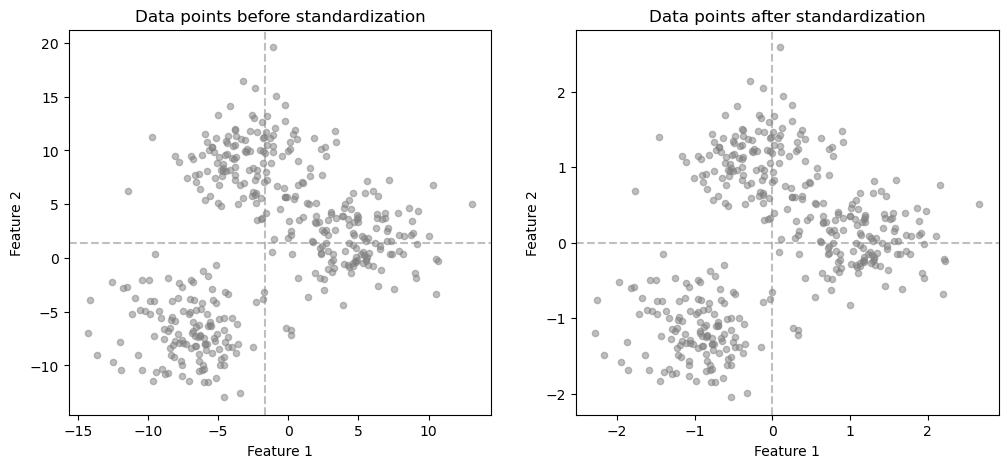

In [86]:
# Visualize data points
fig,ax = plt.subplots(1,2,figsize=(12, 5))
ax[0].scatter(features[:, 0], features[:, 1], c='gray', s=20, alpha=0.5)
ax[0].axhline(features.mean(axis=0)[1],color='gray',linestyle='--',alpha=0.5)
ax[0].axvline(features.mean(axis=0)[0],color='gray',linestyle='--',alpha=0.5)
ax[0].set_title("Data points before standardization")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].scatter(scaled_features[:, 0], scaled_features[:, 1], c='gray', s=20, alpha=0.5)
ax[1].axhline(scaled_features.mean(axis=0)[1],color='gray',linestyle='--',alpha=0.5)
ax[1].axvline(scaled_features.mean(axis=0)[0],color='gray',linestyle='--',alpha=0.5)
ax[1].set_title("Data points after standardization")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
plt.show()

### Run K-Means clustering algorithm

In [87]:
kmeans = KMeans(
    init="random",     # randomize initial cluster centers
    n_clusters=4,      # number of cluster centers
    n_init=10,         # number of trials
    max_iter=300,      # maximum number of iterations
    random_state=8521  # random seed
)

In [88]:
# Fit the model
kmeans.fit(scaled_features)

# Get cluster centers
cluster_labels = kmeans.labels_

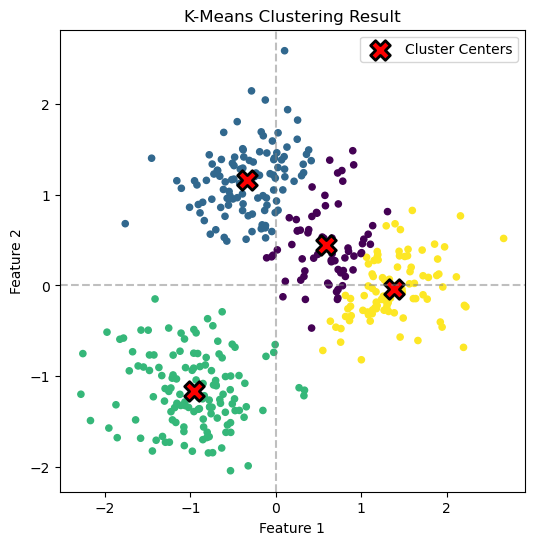

In [89]:
# Plot scatter with colors based on cluster assignment
plt.figure(figsize=(6, 6))
plt.scatter(
    scaled_features[:, 0], 
    scaled_features[:, 1], 
    c=cluster_labels, 
    cmap='viridis', 
    s=20, 
)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    edgecolor='black',
    linewidth=2,
    label='Cluster Centers'
)

plt.axhline(scaled_features.mean(axis=0)[1],color='gray',linestyle='--',alpha=0.5)
plt.axvline(scaled_features.mean(axis=0)[0],color='gray',linestyle='--',alpha=0.5)
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Choosing the appropriate number of clusters

In [90]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the within-cluster sum of squares (WSS) values for each k
WSS = []

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    WSS.append(kmeans.inertia_)
    if k>1:
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_coefficients.append(score)

#### Within-cluster sum of squares (WSS):

$$ WSS = \sum_{i=1}^{n} (x_i - \hat{x}_i)^2 $$

where $x_i$ is a data pint and $\hat{x}_i$ is the predicted cluster center for that data point.

#### Silhouette coefficient (for each data point $x_i$):

$$ s(i) = \frac{b(i) - a(i)}{\max \{a(i),\; b(i)\}} $$

where:

- $a(i)$ = the average distance between point \(i\) and all other points in the **same cluster**  
- $b(i)$ = the **minimum** average distance from point \(i\) to all points in any **other** cluster (i.e., the nearest neighboring cluster)

The overall silhouette score is the average of $s(i)$ across all points.


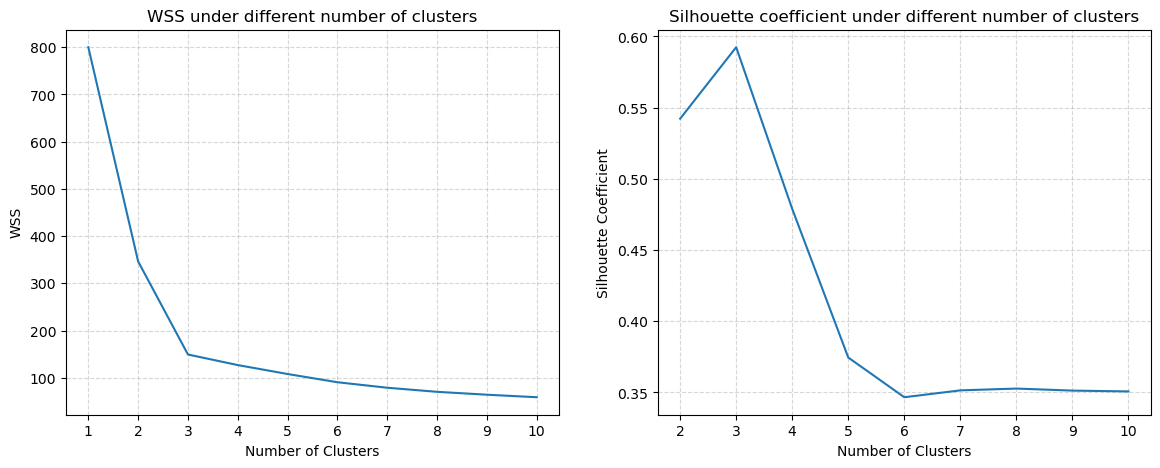

In [92]:
fig,ax = plt.subplots(1,2,figsize=(14, 5))
ax[0].plot(range(1, 11), WSS)
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("WSS")
ax[0].set_title("WSS under different number of clusters")
ax[0].grid(linestyle='--',alpha=0.5)
ax[1].plot(range(2, 11), silhouette_coefficients)
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")
ax[1].set_title("Silhouette coefficient under different number of clusters")
ax[1].grid(linestyle='--',alpha=0.5)
plt.show()
plt.show()

### K-Means with optimal number of clusters

In [93]:
kmeans = KMeans(
    init="random",     # randomize initial cluster centers
    n_clusters=3,      # number of cluster centers
    n_init=10,         # number of trials
    max_iter=300,      # maximum number of iterations
    random_state=8521  # random seed
)

kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

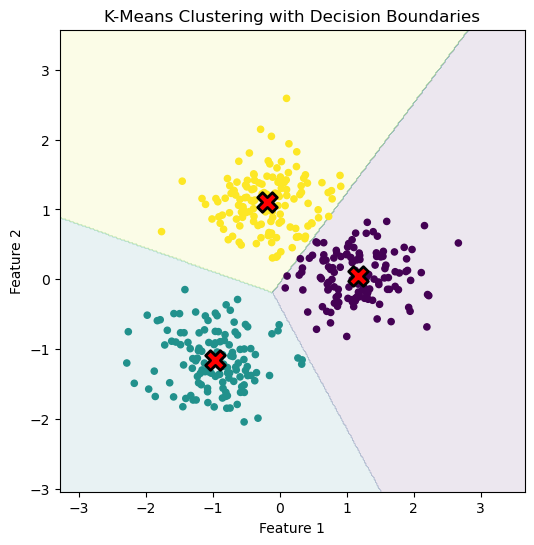

In [94]:
# Create a mesh grid
h = 0.02  # step size (smaller = smoother boundary)
x_min, x_max = scaled_features[:, 0].min() - 1, scaled_features[:, 0].max() + 1
y_min, y_max = scaled_features[:, 1].min() - 1, scaled_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster label for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.1)

# Scatter the data points
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], 
            c=cluster_labels, cmap='viridis', s=20)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', s=200, marker='X', edgecolor='black', linewidth=2)

plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

------------

## Part 2. Dynamic Time Wrapping

### A comparison between Euclidean Distance and DTW Distance

The **Euclidean distance** measures the straight-line distance between two sequences of equal length:

$$
d_{\text{Euclid}}(X1, X2) = \sqrt{\sum_{i=1}^{N} (x1_i - x2_i)^2}
$$

- Requires the two sequences to be **aligned in time**


**Dynamic Time Warping (DTW) Distance** finds an optimal non-linear alignment between two time series:

$$
d_{\text{DTW}}(X1, X2) = \min_{\pi} \sum_{(i, j) \in \pi} \; \text{cost}(x1_i, x2_j)
$$

where $\pi$ is a **warping path** that aligns elements of time series X and Y, allowing stretching and compression along the time axis.

- Considers **time shifts** (similar values occurred at different times)

In [95]:
time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:50]

x1 = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
x2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5)

print(x1.shape)
print(x2.shape)

(50,)
(50,)


In [13]:
# Distance matrix
N = x1.shape[0]
M = x2.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x1[i] - x2[j])

In [14]:
# Warping path
def warp_path(dist_mat):
    N, M = dist_mat.shape

    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [15]:
print('Euclidean Distance:',np.sqrt(np.square(x1-x2).sum()))
print('Normalized Euclidean Distance:',np.sqrt(np.square(x1-x2).sum())/x1.shape[0])

Euclidean Distance: 8.173202805310675
Normalized Euclidean Distance: 0.1634640561062135


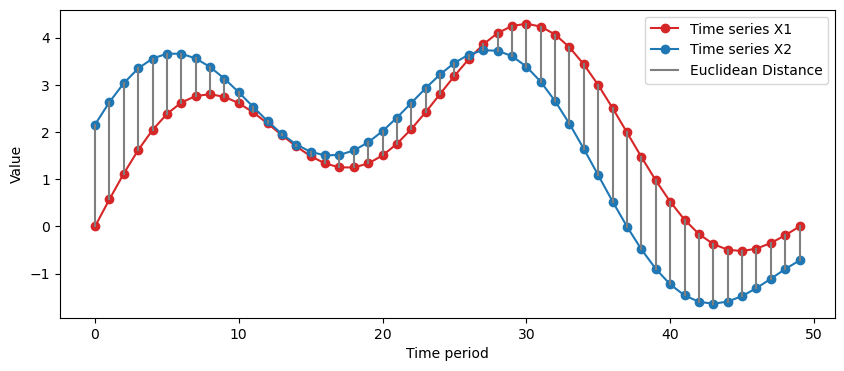

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(x1.shape[0]), x1, "-o", c="C3", )
plt.plot(np.arange(x2.shape[0]), x2, "-o", c="C0", )
for i, (x_i, y_j) in enumerate(zip(x1,  x2)):
    plt.plot([i, i], [x_i, y_j], c="C7")
plt.legend(['Time series X1', 'Time series X2', "Euclidean Distance"]);
plt.xlabel('Time period')
plt.ylabel('Value')
plt.show()

DTW Distance: 25.8184
Normalized DTW Distance: 0.2582


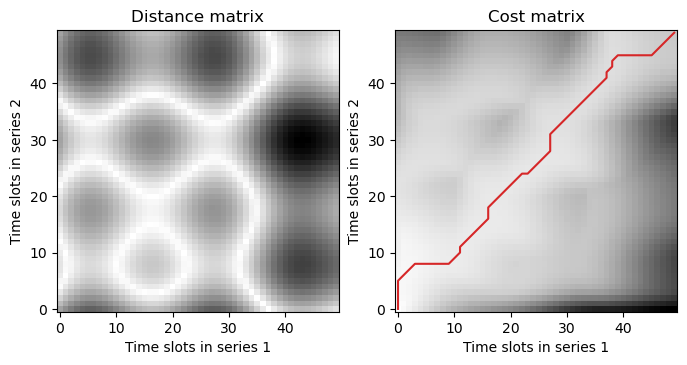

In [17]:
path, cost_mat = warp_path(dist_mat)
print("DTW Distance: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized DTW Distance: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.xlabel('Time slots in series 1')
plt.ylabel('Time slots in series 2')
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.xlabel('Time slots in series 1')
plt.ylabel('Time slots in series 2')
x_path, y_path = zip(*path)
plt.plot(y_path, x_path,c='C3');

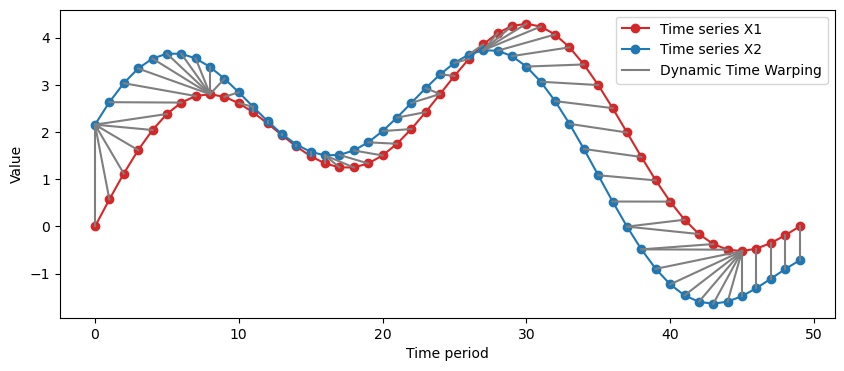

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(x1.shape[0]), x1, "-o", c="C3",)
plt.plot(np.arange(x2.shape[0]), x2, "-o", c="C0",)
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x1[x_i], x2[y_j]], c="C7")
plt.legend(['Time series X1', 'Time series X2', "Dynamic Time Warping"])
plt.xlabel('Time period')
plt.ylabel('Value')
plt.show()

### K-Means with DTW (Urban Park Rhythm)

In [51]:
Park_VDC = pd.read_csv('Park_VDC.csv')
time_series = ['6:00-6:30','6:30-7:00','7:00-7:30','7:30-8:00','8:00-8:30','8:30-9:00','9:00-9:30','9:30-10:00',
         '10:00-10:30','10:30-11:00','11:00-11:30','11:30-12:00','12:00-12:30',
         '12:30-13:00','13:00-13:30','13:30-14:00','14:00-14:30','14:30-15:00',
        '15:00-15:30','15:30-16:00','16:00-16:30','16:30-17:00','17:00-17:30',
         '17:30-18:00','18:00-18:30','18:30-19:00','19:00-19:30','19:30-20:00',
         '20:00-20:30','20:30-21:00','21:00-21:30','21:30-22:00']

In [52]:
Clustering_data = pd.DataFrame()
columns = ['Weekday_'+x for x in time_series]+['Weekend_'+x for x in time_series]+['Holiday_'+x for x in time_series]
for park_id in Park_VDC['park_id'].unique():
    for season in Park_VDC['Season'].unique():
        curve_id = park_id +'_'+ season
        data = Park_VDC[(Park_VDC['park_id']==park_id)&(Park_VDC['Season']==season)]
        data = pd.DataFrame(pd.concat([data['Weekday'],data['Weekend'],data['Holiday']])).T 
        data.columns = columns
        data.index=[curve_id]
        Clustering_data = pd.concat([Clustering_data,data])

Clustering_data = Clustering_data[Clustering_data.sum(axis=1)>10000]

In [53]:
def plot_TDCs(TDC_data,ax,color='#d62728'):
    # park_id = TDC_data['park_id'].unique()[0]
    # season = TDC_data['Season'].unique()[0]
    data = TDC_data.copy()
    data.plot(kind='line',style='-o',markersize=3,xticks=list(np.arange(0,len(data.index),2)),rot=90,
                  ax=ax,color=color,label='TVC, %s, %s'%(park_id,season))
    ax.set_ylim([0,max(np.max(data)*1.05,np.max(data)*1.05)])
    ax.set_xlim([-1,96])
    ax.set_xlabel('Time of day (30 min)',size=14)
    ax.set_ylabel('Visitor density (person/ha)',size=14)
    ax.axvline(x=32, color='grey', linestyle='--',linewidth=2,alpha=0.9)
    ax.axvline(x=64, color='grey', linestyle='--',linewidth=2,alpha=0.99)
    ax.text(12,np.max(data)*0.07,'Weekday',color='black',fontsize = 16,alpha=0.9)
    ax.text(12+32,np.max(data)*0.03,'Weekend',color='black',fontsize = 16,alpha=0.9)
    ax.text(12+64,np.max(data)*0.03,'Holiday',color='black',fontsize = 16,alpha=0.9)
    # ax.legend(fontsize = 12)
    ax.set_title('Park Visitation Dynamic Curve (VDC)',fontsize = 16)
    ax.grid(linestyle='--',alpha=0.7)

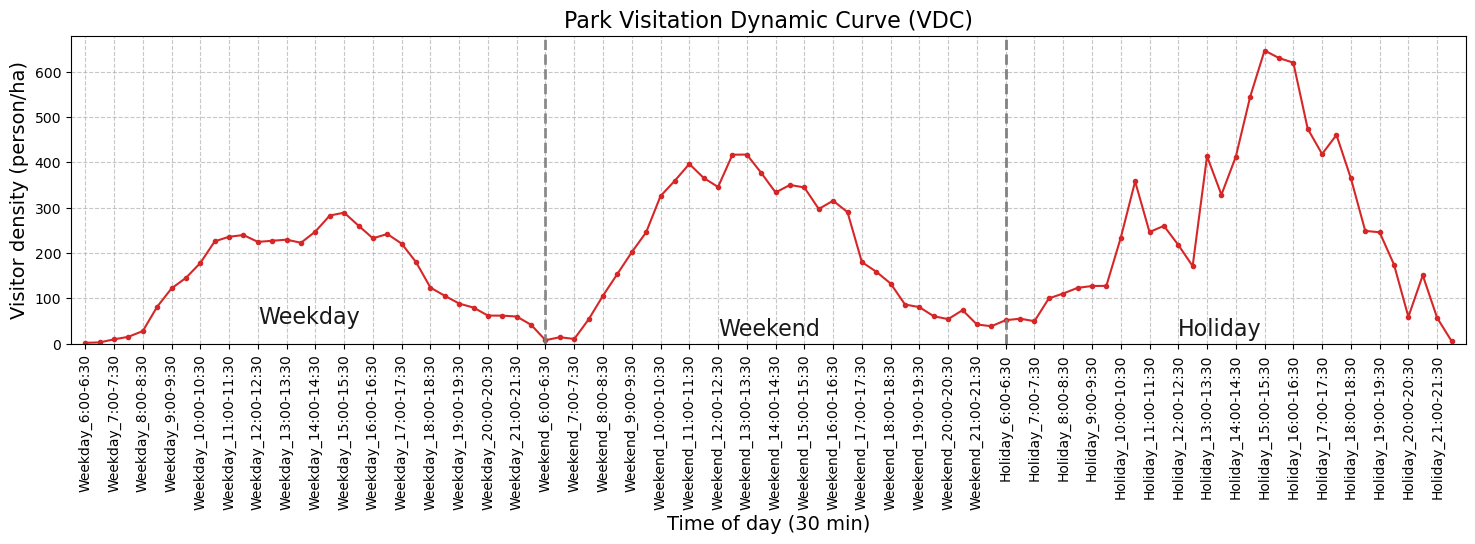

In [56]:
TDC = Clustering_data.iloc[3]
fig,ax = plt.subplots(figsize=(18,4))
plot_TDCs(TDC,ax)

In [140]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import tslearn

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("tslearn:", tslearn.__version__)

numpy: 2.2.4
pandas: 2.2.3
matplotlib: 3.10.1
scikit-learn: 1.6.1
tslearn: 0.6.4


In [135]:
from tslearn.clustering import TimeSeriesKMeans,silhouette_score
# Standardization
mm = MinMaxScaler()
scaled_mm = mm.fit_transform(Clustering_data.T)
df_mm =pd.DataFrame(scaled_mm.T,columns=Clustering_data.columns,index=Clustering_data.index)
X_mm = df_mm.values

In [136]:
silhoutte_score = []

for i in range(2, 6):
    start = time.time()
    km = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=100, max_iter_barycenter=10, random_state=8521)
    y_pred = km.fit_predict(X_mm)
    score = silhouette_score(X_mm, y_pred, metric="dtw")
    silhoutte_score.append(score)
    stop = time.time()
    duration = stop - start
    print(f"K = {i}.", f"Took {duration:.2f} seconds to calculate.")

K = 2. Took 6.18 seconds to calculate.
K = 3. Took 6.55 seconds to calculate.
K = 4. Took 6.78 seconds to calculate.
K = 5. Took 5.12 seconds to calculate.


In [137]:
silhoutte_score

[np.float64(0.30826590972407136),
 np.float64(0.2561331248453779),
 np.float64(0.26650939115276495),
 np.float64(0.15820320868728163)]

In [138]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=100, max_iter_barycenter=10, random_state=8521)
y_pred = km.fit_predict(X_mm)

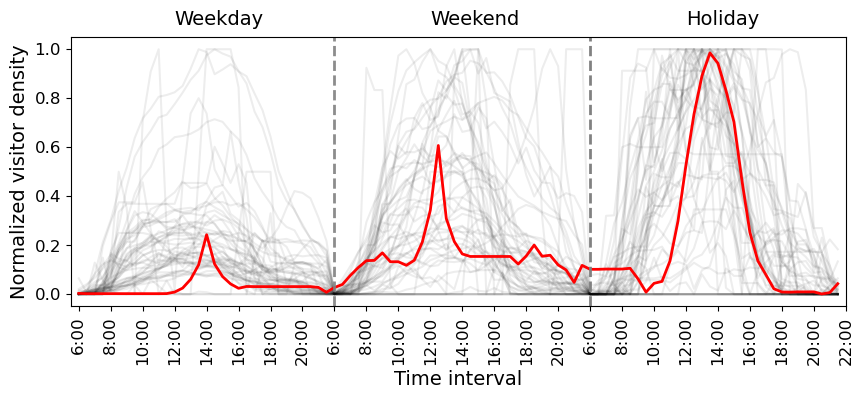

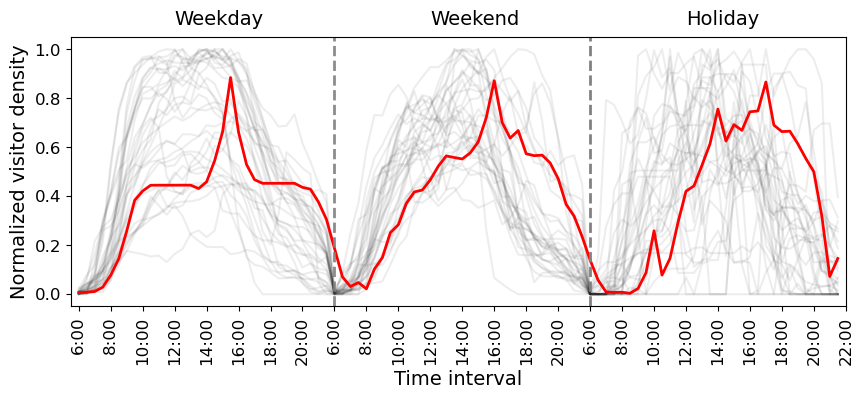

In [139]:
time_series2 = [x.split('-')[0] for x in time_series]
for yi in range(len(np.unique(y_pred))):
    plt.figure(figsize=(10,3.5))
    for xx in X_mm[y_pred == yi]:
        plt.plot(xx.ravel(), "-", alpha=.07,color='black')
    plt.plot(km.cluster_centers_[yi].ravel(), "r-",linewidth=2)
    plt.xticks(list(np.arange(0,len(time_series2)*3,4))+[96],[time_series2[x] for x in range(len(time_series2)) if x%4==0]*3+['22:00'],rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([-1,96])
    plt.xlabel('Time interval',size=14)
    plt.ylabel('Normalized visitor density',size=14)
    plt.axvline(x=32, color='grey', linestyle='--',linewidth=2,alpha=0.9)
    plt.axvline(x=64, color='grey', linestyle='--',linewidth=2,alpha=0.99)
    plt.text(12,1.1,'Weekday',color='black',fontsize = 14,alpha=1)
    plt.text(12+32,1.1,'Weekend',color='black',fontsize = 14,alpha=1)
    plt.text(12+64,1.1,'Holiday',color='black',fontsize = 14,alpha=1)